# Image Classification on Commonly Misdiagnosed Cancers

### Cancer misdiagnosis is frequently caused by flaws or human error in the testing process. Cancer misdiagnosis occurs as a result of false positive and false negative test results. False positive cancer test results indicate the presence of cancer when the patient does not have cancer. Depending on the study, data shows that doctors misdiagnose cancer in about 46% of patients (Aaronson et al, 2019). Furthermore, some medical researchers believe the true numbers are higher because many incorrect diagnoses go unreported or are not pursued through legal action. While doctors can misdiagnose almost any type of cancer, some are more prone to errors than others. Some cancers have symptoms that are similar to those of other diseases. The objective of this research project is to help prevent the misdiagnosis of different cancer diseases, to do so we will be focusing on image recognition. The models that will be used in this study are  Convolutional Neural Network(CNN): Sequential model, VGG16 model, and Residual Network (ResNet50) Model. 

A full overview of this project is available to read here. https://docs.google.com/document/d/16myX10uw1TfsOlJIU4_Hr2g6ZJKe6jkb7wXyMCEYExE/edit?usp=sharing

# 1. Install Dependencies and Setup

In [1]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.3.0
agate                         1.6.3
aiohttp                       3.8.3
aiosignal                     1.2.0
altair                        4.2.2
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asn1crypto                    1.5.1
asttokens                     2.0.8
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.1.0
Automat                       20.2.0
Babel                         2.10.3
backcall                      0.2.0
bcrypt                        4.0.1
beautifulsoup4                4.11.1
bleach                        5.0.1
blis                          0.7.9
boto3                         1.24.95
botocore                      1.27.95
branca                        0.5.0
cachetools                    5.2.0
catalogue 

In [2]:
import tensorflow as tf 
import os

2023-05-11 00:28:01.008485: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 00:28:01.112120: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-11 00:28:01.117040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-11 00:28:01.117057: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-05-11 00:28:09.890221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-11 00:28:09.890249: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-11 00:28:09.890263: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-e12bc7d3-6b03-4608-9bcb-a03ef893b7a9): /proc/driver/nvidia/version does not exist


In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [5]:
import imghdr

In [6]:
data_dir = '/work/Cancer3'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image /work/Cancer3/PC/ProstateC40.jpeg
Issue with image /work/Cancer3/PC/ProstateC22.jpeg
Issue with image /work/Cancer3/PC/ProstateC17.jpeg
Issue with image /work/Cancer3/PC/ProstateC26.jpeg
Issue with image /work/Cancer3/PC/ProstateC32.jpeg
Issue with image /work/Cancer3/PC/ProstateC03.jpeg
Issue with image /work/Cancer3/PC/ProstateC07.jpeg
Issue with image /work/Cancer3/PC/ProstateC36.jpeg
Issue with image /work/Cancer3/PC/ProstateC33.jpeg
Issue with image /work/Cancer3/PC/ProstateC37.jpeg
Issue with image /work/Cancer3/PC/ProstateC41.jpeg
Issue with image /work/Cancer3/PC/ProstateC23.jpeg
Issue with image /work/Cancer3/PC/ProstateC12.jpeg
Issue with image /work/Cancer3/PC/ProstateC16.jpeg
Issue with image /work/Cancer3/PC/ProstateC27.jpeg
Issue with image /work/Cancer3/PC/ProstateC29.jpeg
Issue with image /work/Cancer3/PC/ProstateC18.jpeg
Issue with image /work/Cancer3/PC/ProstateC31.jpeg
Issue with image /work/Cancer3/PC/ProstateC04.jpeg
Issue with image /work/Cancer3/

# 3. Load Data

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('/work/Cancer3')

Found 72 files belonging to 2 classes.
2023-05-11 00:28:10.822611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

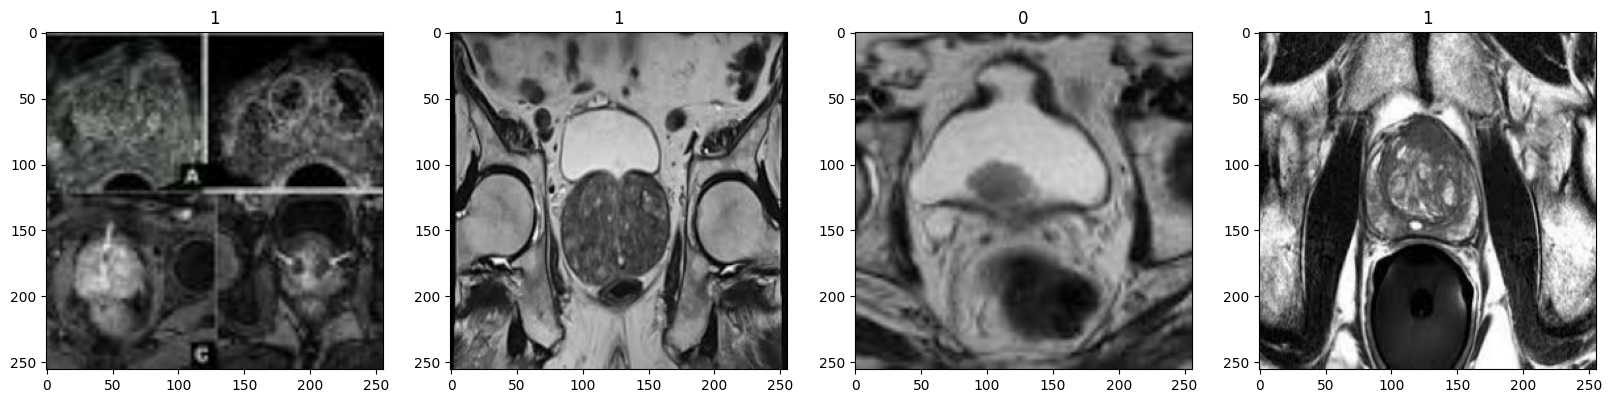

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.1882353 , 0.20392157, 0.2       ],
          [0.18452819, 0.20021446, 0.19629289],
          [0.1676777 , 0.18336397, 0.1794424 ],
          ...,
          [0.22974877, 0.2258272 , 0.24543504],
          [0.17000613, 0.16608456, 0.1856924 ],
          [0.15686275, 0.15294118, 0.17254902]],
 
         [[0.18722427, 0.20291054, 0.19898897],
          [0.18366197, 0.19934824, 0.19542667],
          [0.1674697 , 0.18315597, 0.1792344 ],
          ...,
          [0.22753452, 0.22361295, 0.24322079],
          [0.16739693, 0.16347536, 0.1830832 ],
          [0.15416667, 0.1502451 , 0.16985294]],
 
         [[0.18262868, 0.19831495, 0.19439338],
          [0.1797246 , 0.19541088, 0.19148931],
          [0.16652425, 0.18221052, 0.17828895],
          ...,
          [0.21746969, 0.21354812, 0.23315597],
          [0.15553696, 0.1516154 , 0.17122324],
          [0.14191176, 0.13799019, 0.15759803]],
 
         ...,
 
         [[0.1426777 , 0.1426777 , 0.15052083],
          [0.14201

# 5. Split Data

In [16]:
count = 0
for batch in data:
    count += len(batch[0])
train_size = int(count * 0.7)
val_size = int(count * 0.2)
test_size = int(count * 0.1)


In [17]:
train_size

50

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 1s 137ms/step - loss: 1.3629 - accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 0s 131ms/step - loss: 1.0741 - accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 111ms/step - loss: 0.6856 - accuracy: 0.4861
Epoch 4/20
3/3 [==============================] - 0s 108ms/step - loss: 0.6307 - accuracy: 0.6806
Epoch 5/20
3/3 [==============================] - 0s 107ms/step - loss: 0.6071 - accuracy: 0.9444
Epoch 6/20
3/3 [==============================] - 0s 104ms/step - loss: 0.5731 - accuracy: 0.8611
Epoch 7/20
3/3 [==============================] - 0s 100ms/step - loss: 0.5122 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 127ms/step - loss: 0.4596 - accuracy: 0.9444
Epoch 9/20
3/3 [==============================] - 0s 112ms/step - loss: 0.3743 - accuracy: 0.9861
Epoch 10/20
3/3 [==============================] - 0s 107ms/step - loss: 0.2915 - accuracy: 0.9722
Epoch 11/20
3/3 [==

# 8. Plot Performance

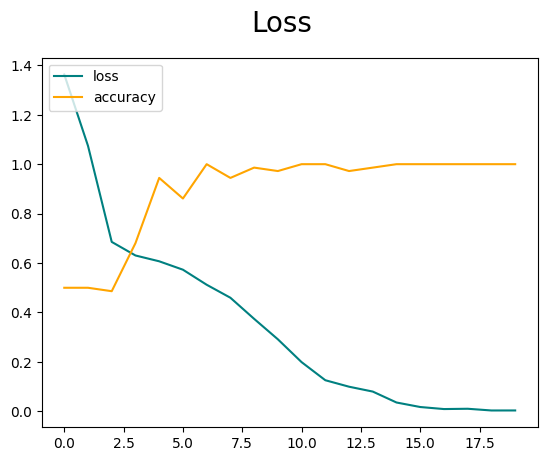

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [34]:
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(20):
    hist = model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])
    train_loss.append(hist.history['loss'][0])
    train_accuracy.append(hist.history['accuracy'][0])


results = pd.DataFrame({'Train Accuracy': train_accuracy,
                       'Train Loss': train_loss,
                       'Epochs': range(1, 21)})

# Display the table
print(results)

3/3 [==============================] - 0s 116ms/step - loss: 6.4888e-05 - accuracy: 1.0000
    Train Accuracy  Train Loss  Epochs
0              1.0    0.000122       1
1              1.0    0.000115       2
2              1.0    0.000119       3
3              1.0    0.000114       4
4              1.0    0.000106       5
5              1.0    0.000099       6
6              1.0    0.000100       7
7              1.0    0.000098       8
8              1.0    0.000092       9
9              1.0    0.000089      10
10             1.0    0.000088      11
11             1.0    0.000086      12
12             1.0    0.000083      13
13             1.0    0.000079      14
14             1.0    0.000074      15
15             1.0    0.000073      16
16             1.0    0.000070      17
17             1.0    0.000068      18
18             1.0    0.000066      19
19             1.0    0.000065      20


# 10. Test

In [35]:
from PIL import Image

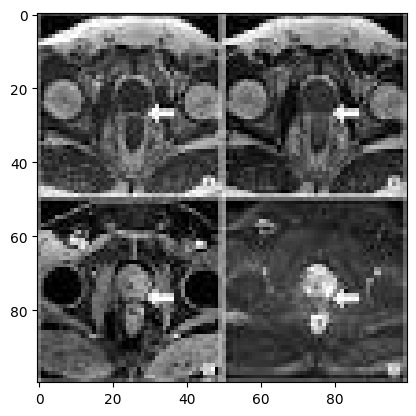

In [36]:
img = Image.open('/work/Cancer3/PC/ProstateC08.jpeg')
plt.imshow(img)
plt.show()


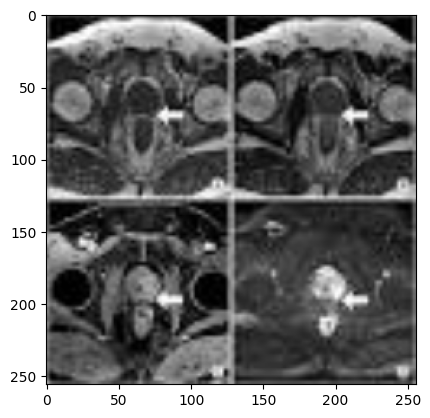

In [37]:

# Convert the image to a tensor
img_tensor = tf.keras.preprocessing.image.img_to_array(img)

# Resize the tensor
resize = tf.image.resize(img_tensor, (256,256))

# Display the resized image
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
img_rgb = img.convert('RGB')
img_resized = img_rgb.resize((256, 256))

# Convert to numpy array
img_array = np.array(img_resized)

# Preprocess image and make prediction
yhat = model.predict(np.expand_dims(img_array/255, 0))


1/1 [==============================] - 0s 97ms/step


In [39]:
predicted_class = np.argmax(yhat)

# Get the test accuracy and test loss for the predicted class
test_accuracy = yhat[0][predicted_class]
test_loss = -np.log(yhat[0][predicted_class])

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.99999845
Test Loss: 1.5497219e-06


In [40]:
if yhat < 0.5: 
    print(f'Predicted class is BladderCancer')
else:
    print(f'Predicted class is ProstateCancer')

Predicted class is ProstateCancer


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e12bc7d3-6b03-4608-9bcb-a03ef893b7a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>